In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

class_label_mapping = {
    11: 'Expert',
    12: 'Not Expert',
    21: 'Back Pain',
    22: 'Parkinson',
    23: 'Stroke'
}

def visualize_data(df, class_column,save_directory):
    """
    Visualize the number of records in each class from a DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        class_column (str): The name of the column containing the class labels.

    Returns:
        None
    """
    # Replace class labels with class names using the mapping dictionary
    df[class_column] = df[class_column].map(class_label_mapping)

    # Count the number of records in each class
    class_counts = df[class_column].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    # plt.show()
    # Save the plot to the specified directory
    save_path = os.path.join(save_directory, 'class_distribution_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    # Close the plot to prevent displaying it
    plt.close()


def loadData(path):
  data = pd.read_csv(path)
  X = data.iloc[:, :-1].values
  Y = data.iloc[:, -1].values
  return X,Y,data



In [ ]:
X,Y,data = loadData("kimore_data_new.csv")
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '492', '493', '494', '495', '496', '497', '498', '499', '500',
       'target'],
      dtype='object', length=501)

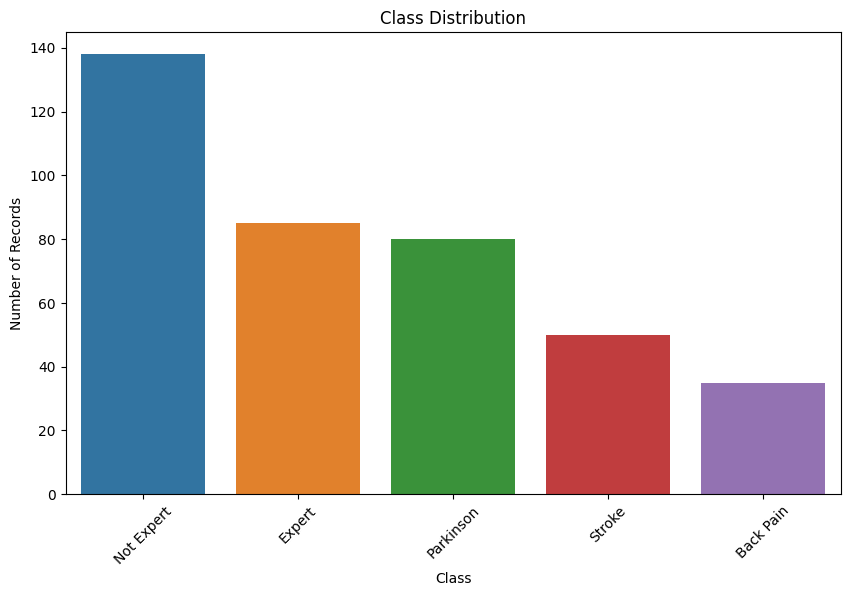

In [ ]:
visualize_data(data, 'target',"")


#Merging Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading Files
df_mean = pd.read_csv("/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/mean/all.csv")
df_median = pd.read_csv("/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/median/all.csv")
df_min = pd.read_csv("/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/min/all.csv")
df_max = pd.read_csv("/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/max/all.csv")
df_std = pd.read_csv("/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/std/all.csv")
df_std.head()

,No,WaistX,WaistY,WaistZ\t,SpineX,SpineY,SpineZ,ChestX,ChestY,ChestZ,...,RightLowerLegX,RightLowerLegY,RightLowerLegZ,RightFootX,RightFootY,RightFootZ,RightLegToesX,RightLegToesY,RightLegToesZ,Class
0,1,21.622184,0.438169,6.837289,1.036170,0,0,0.463957,0,0,...,0.919732,0,0,2.390900,0,0,0,0,1.237608,1
1,2,21.770000,0.886439,4.963976,0.807355,0,0,0.558808,0,0,...,3.245500,0,0,1.883669,0,0,0,0,2.411950,1
2,3,22.517851,0.710299,7.013482,1.016699,0,0,0.588539,0,0,...,2.250404,0,0,2.703325,0,0,0,0,2.178907,1
3,4,21.103837,0.775896,7.116058,1.137433,0,0,0.598562,0,0,...,0.901587,0,0,2.567187,0,0,0,0,1.142424,1
4,5,22.822445,0.720293,6.951210,0.899875,0,0,0.705277,0,0,...,2.134820,0,0,2.851683,0,0,0,0,2.594134,1


In [ ]:
#Deleting Duplicated Columns
df_min = df_min.drop("Class", axis='columns')
df_min = df_min.drop("No", axis='columns')
df_max = df_max.drop("Class", axis='columns')
df_max = df_max.drop("No", axis='columns')
df_std = df_std.drop("Class", axis='columns')
df_std = df_std.drop("No", axis='columns')
df_median = df_median.drop("Class", axis='columns')
df_median = df_median.drop("No", axis='columns')

In [ ]:
#adding Suffix to Columns
df_mean = df_mean.add_suffix('_mean')
df_min = df_min.add_suffix('_min')
df_max = df_max.add_suffix('_max')
df_std = df_std.add_suffix('_std')
df_median = df_median.add_suffix('_median')
df_mean.head()

,No_mean,WaistX_mean,WaistY_mean,WaistZ\t_mean,SpineX_mean,SpineY_mean,SpineZ_mean,ChestX_mean,ChestY_mean,ChestZ_mean,...,RightLowerLegX_mean,RightLowerLegY_mean,RightLowerLegZ_mean,RightFootX_mean,RightFootY_mean,RightFootZ_mean,RightLegToesX_mean,RightLegToesY_mean,RightLegToesZ_mean,Class_mean
0,1,59.116635,-8.888771,59.116635,28.146903,-0.00001,28.146903,20.940198,0.0,20.940198,...,-33.803881,0.00001,-33.803881,-36.858458,0.00000,-36.858458,0.00000,0.00001,0.00000,1
1,2,75.679206,-9.917680,75.679206,31.219545,0.00000,31.219545,23.076841,0.0,23.076841,...,-41.638991,-0.00001,-41.638991,-42.339735,0.00001,-42.339735,-0.00001,0.00000,-0.00001,1
2,3,62.243256,-2.678681,62.243256,27.170096,-0.00001,27.170096,20.203050,0.0,20.203050,...,-34.047587,0.00000,-34.047587,-38.716452,0.00000,-38.716452,0.00001,0.00000,0.00001,1
3,4,58.919100,-9.163417,58.919100,28.130843,-0.00001,28.130843,20.876816,0.0,20.876816,...,-33.953332,0.00001,-33.953332,-36.978224,0.00000,-36.978224,0.00000,0.00001,0.00000,1
4,5,60.337182,-2.942027,60.337182,27.498439,-0.00001,27.498439,20.563306,0.0,20.563306,...,-33.635413,0.00000,-33.635413,-38.821433,0.00000,-38.821433,0.00001,0.00000,0.00001,1


In [ ]:
#rename Columns
df_mean.rename(columns = {'Class_mean':'Class'}, inplace = True)
df_mean.rename(columns = {'No_mean':'No'}, inplace = True)
df_mean.head()

,No,WaistX_mean,WaistY_mean,WaistZ\t_mean,SpineX_mean,SpineY_mean,SpineZ_mean,ChestX_mean,ChestY_mean,ChestZ_mean,...,RightLowerLegX_mean,RightLowerLegY_mean,RightLowerLegZ_mean,RightFootX_mean,RightFootY_mean,RightFootZ_mean,RightLegToesX_mean,RightLegToesY_mean,RightLegToesZ_mean,Class
0,1,59.116635,-8.888771,59.116635,28.146903,-0.00001,28.146903,20.940198,0.0,20.940198,...,-33.803881,0.00001,-33.803881,-36.858458,0.00000,-36.858458,0.00000,0.00001,0.00000,1
1,2,75.679206,-9.917680,75.679206,31.219545,0.00000,31.219545,23.076841,0.0,23.076841,...,-41.638991,-0.00001,-41.638991,-42.339735,0.00001,-42.339735,-0.00001,0.00000,-0.00001,1
2,3,62.243256,-2.678681,62.243256,27.170096,-0.00001,27.170096,20.203050,0.0,20.203050,...,-34.047587,0.00000,-34.047587,-38.716452,0.00000,-38.716452,0.00001,0.00000,0.00001,1
3,4,58.919100,-9.163417,58.919100,28.130843,-0.00001,28.130843,20.876816,0.0,20.876816,...,-33.953332,0.00001,-33.953332,-36.978224,0.00000,-36.978224,0.00000,0.00001,0.00000,1
4,5,60.337182,-2.942027,60.337182,27.498439,-0.00001,27.498439,20.563306,0.0,20.563306,...,-33.635413,0.00000,-33.635413,-38.821433,0.00000,-38.821433,0.00001,0.00000,0.00001,1


In [ ]:
#Merge Files
res = pd.concat([df_mean, df_min,df_max,df_std,df_median], axis=1)
res.head()

,No,WaistX_mean,WaistY_mean,WaistZ\t_mean,SpineX_mean,SpineY_mean,SpineZ_mean,ChestX_mean,ChestY_mean,ChestZ_mean,...,RightUpperLegZ_median,RightLowerLegX_median,RightLowerLegY_median,RightLowerLegZ_median,RightFootX_median,RightFootY_median,RightFootZ_median,RightLegToesX_median,RightLegToesY_median,RightLegToesZ_median
0,1,59.116635,-8.888771,59.116635,28.146903,-0.00001,28.146903,20.940198,0.0,20.940198,...,2.93044,-33.95082,0.00001,0.00002,-35.76582,0.00000,0.00000,0.00000,0.00001,9.68135
1,2,75.679206,-9.917680,75.679206,31.219545,0.00000,31.219545,23.076841,0.0,23.076841,...,3.96756,-39.70029,-0.00001,-0.00002,-42.15953,0.00001,0.00002,-0.00001,0.00000,11.24761
2,3,62.243256,-2.678681,62.243256,27.170096,-0.00001,27.170096,20.203050,0.0,20.203050,...,3.13766,-34.44050,0.00000,-0.00002,-38.93240,0.00000,-0.00002,0.00001,0.00000,14.16384
3,4,58.919100,-9.163417,58.919100,28.130843,-0.00001,28.130843,20.876816,0.0,20.876816,...,3.07262,-33.97501,0.00001,0.00002,-36.33124,0.00000,0.00000,0.00000,0.00001,9.73457
4,5,60.337182,-2.942027,60.337182,27.498439,-0.00001,27.498439,20.563306,0.0,20.563306,...,3.00751,-34.08747,0.00000,-0.00002,-39.04974,0.00000,-0.00002,0.00001,0.00000,14.10561


In [ ]:
#Exporting Data
res.to_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/all_data_different_feature_methods.csv', index=False)

#Installing PyCaret Dependencies

In [ ]:
!pip install --pre pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing Libs

In [ ]:
import pandas as pd

#Running PyCaret : Top Algorithms

##Loading Data : X2 Selection

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_X2.csv')
data.head()

,No,WaistX_std,WaistZ\t_std,WaistY_std,LeftUpperLegX_std,RightUpperLegX_std,WaistX_min,WaistZ\t_min,RightUpperLegZ_std,LeftUpperLegZ_std,...,LeftUpperLegZ_max,RightUpperLegX_max,RightUpperLegZ_max,LeftCollarX_max,LeftCollarZ_max,WaistX_mean,WaistZ\t_mean,LeftCollarX_median,RightLowerLegX_std,Class
0,1,21.622184,6.837289,0.438169,0.715066,0.949799,24.96921,24.96921,0.386053,0.386051,...,2.46405,2.50978,2.50978,0.61186,0.61186,59.116635,59.116635,0.20433,0.919732,1
1,2,21.770000,4.963976,0.886439,0.895888,0.927836,41.24372,41.24372,0.236830,0.236827,...,2.25342,2.22210,2.22210,0.90005,0.90005,75.679206,75.679206,0.32582,3.245500,1
2,3,22.517851,7.013482,0.710299,0.898732,1.026812,25.44714,25.44714,0.395997,0.396001,...,2.83436,2.34998,2.34998,0.88150,0.88150,62.243256,62.243256,0.38366,2.250404,1
3,4,21.103837,7.116058,0.775896,0.782466,0.971065,24.21606,24.21606,0.348116,0.348117,...,2.39800,2.32394,2.32394,0.64656,0.64656,58.919100,58.919100,0.24443,0.901587,1
4,5,22.822445,6.951210,0.720293,0.931762,0.958848,23.01324,23.01324,0.430743,0.430745,...,3.19397,2.84906,2.84906,0.81252,0.81252,60.337182,60.337182,0.24315,2.134820,1


In [ ]:
# View the data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  2000 non-null   int64  
 1   WaistX_std          2000 non-null   float64
 2   WaistZ	_std         2000 non-null   float64
 3   WaistY_std          2000 non-null   float64
 4   LeftUpperLegX_std   2000 non-null   float64
 5   RightUpperLegX_std  2000 non-null   float64
 6   WaistX_min          2000 non-null   float64
 7   WaistZ	_min         2000 non-null   float64
 8   RightUpperLegZ_std  2000 non-null   float64
 9   LeftUpperLegZ_std   2000 non-null   float64
 10  LeftUpperLegX_max   2000 non-null   float64
 11  LeftUpperLegZ_max   2000 non-null   float64
 12  RightUpperLegX_max  2000 non-null   float64
 13  RightUpperLegZ_max  2000 non-null   float64
 14  LeftCollarX_max     2000 non-null   float64
 15  LeftCollarZ_max     2000 non-null   float64
 16  WaistX

###Loading Classifiers

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(
    data=data,
    target='Class',
    train_size=0.8,
    normalize=True,
    session_id=123
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


###Running Classifiers

In [ ]:
# Compare and sort models by AUC
compare_models(sort='Accuracy',fold=30)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9900,0.9947,0.9900,0.9928,0.9897,0.9894,0.9896,0.0760
lightgbm,Light Gradient Boosting Machine,0.9894,0.9999,0.9894,0.9923,0.9891,0.9888,0.9890,2.3933
gbc,Gradient Boosting Classifier,0.9887,0.9986,0.9887,0.9918,0.9883,0.9881,0.9884,15.4150
et,Extra Trees Classifier,0.9837,0.9996,0.9837,0.9878,0.9831,0.9828,0.9831,0.2750
rf,Random Forest Classifier,0.9831,0.9998,0.9831,0.9877,0.9825,0.9822,0.9825,0.5143
lda,Linear Discriminant Analysis,0.9787,0.9998,0.9787,0.9844,0.9780,0.9776,0.9780,0.0643
nb,Naive Bayes,0.9594,0.9988,0.9594,0.9680,0.9577,0.9572,0.9579,0.0630
knn,K Neighbors Classifier,0.9200,0.9915,0.9200,0.9340,0.9158,0.9157,0.9171,0.0723
lr,Logistic Regression,0.9075,0.9955,0.9075,0.9224,0.9039,0.9025,0.9038,1.1073
svm,SVM - Linear Kernel,0.8177,0.0000,0.8177,0.8565,0.8094,0.8079,0.8125,0.1017


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

##Loading Data : *FCBF*

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_fcbf.csv')
data.head()

,No,WaistX_std,WaistZ\t_std,WaistY_std,RightUpperLegZ_std,RightUpperLegZ_mean,LeftCollarX_median,RightLowerLegX_std,RightCollarZ_max,LeftFootX_std,...,RightLegToesZ_std,RightCollarZ_min,RightFootZ_min,RightCollarZ_median,RightUpperLegZ_median,LeftForearmY_std,NeckY_median,RightForearmY_min,RightUpperArmY_std,Class
0,1,21.622184,6.837289,0.438169,0.386053,1.316243,0.20433,0.919732,0.58879,2.749129,...,1.237608,-0.14659,-43.50766,0.31450,2.93044,1.027921,0.0,-25.60838,0.316884,1
1,2,21.770000,4.963976,0.886439,0.236830,0.912902,0.32582,3.245500,1.02643,2.124881,...,2.411950,0.09609,-47.23304,0.07571,3.96756,2.828573,0.0,-31.49242,0.411463,1
2,3,22.517851,7.013482,0.710299,0.395997,1.204702,0.38366,2.250404,0.69235,3.489572,...,2.178907,-0.09126,-43.69500,0.19632,3.13766,0.684797,0.0,-26.73782,0.566713,1
3,4,21.103837,7.116058,0.775896,0.348116,1.083654,0.24443,0.901587,0.62284,2.641380,...,1.142424,-0.16100,-43.51122,0.25471,3.07262,1.310858,0.0,-26.29142,0.431707,1
4,5,22.822445,6.951210,0.720293,0.430743,1.366020,0.24315,2.134820,0.56200,3.846815,...,2.594134,-0.04816,-43.48781,0.00114,3.00751,0.840864,0.0,-26.87014,0.784433,1


In [ ]:
# View the data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     2000 non-null   int64  
 1   WaistX_std             2000 non-null   float64
 2   WaistZ	_std            2000 non-null   float64
 3   WaistY_std             2000 non-null   float64
 4   RightUpperLegZ_std     2000 non-null   float64
 5   RightUpperLegZ_mean    2000 non-null   float64
 6   LeftCollarX_median     2000 non-null   float64
 7   RightLowerLegX_std     2000 non-null   float64
 8   RightCollarZ_max       2000 non-null   float64
 9   LeftFootX_std          2000 non-null   float64
 10  RightFootX_std         2000 non-null   float64
 11  RightLegToesZ_std      2000 non-null   float64
 12  RightCollarZ_min       2000 non-null   float64
 13  RightFootZ_min         2000 non-null   float64
 14  RightCollarZ_median    2000 non-null   float64
 15  Righ

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(
    data=data,
    target='Class',
    train_size=0.7,
    normalize=True,
    session_id=123,
    fold=30
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1400, 21)"
7,Transformed test set shape,"(600, 21)"
8,Numeric features,20
9,Preprocess,True


In [ ]:
# Compare and sort models by AUC
best = compare_models(sort='Accuracy',fold=30)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9964,1.0000,0.9964,0.9974,0.9962,0.9962,0.9963,0.2487
rf,Random Forest Classifier,0.9957,1.0000,0.9957,0.9971,0.9955,0.9955,0.9956,0.4540
lightgbm,Light Gradient Boosting Machine,0.9936,0.9997,0.9936,0.9957,0.9933,0.9932,0.9934,2.2023
dt,Decision Tree Classifier,0.9907,0.9951,0.9907,0.9936,0.9903,0.9902,0.9904,0.0683
gbc,Gradient Boosting Classifier,0.9893,0.9982,0.9893,0.9913,0.9883,0.9887,0.9890,13.0170
lda,Linear Discriminant Analysis,0.9893,0.9999,0.9893,0.9927,0.9887,0.9887,0.9889,0.0570
nb,Naive Bayes,0.9685,0.9997,0.9685,0.9720,0.9641,0.9668,0.9678,0.0540
lr,Logistic Regression,0.9486,0.9980,0.9486,0.9590,0.9447,0.9457,0.9469,0.8120
svm,SVM - Linear Kernel,0.9293,0.0000,0.9293,0.9403,0.9241,0.9254,0.9269,0.0813
knn,K Neighbors Classifier,0.9208,0.9950,0.9208,0.9361,0.9151,0.9164,0.9181,0.0610


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(best)

##Loading Data : *FRelief*

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_frelief.csv')
data.head()


,No,WaistX_std,WaistZ\t_min,WaistX_min,HeadTipZ_median,WaistZ\t_mean,WaistX_mean,ChestZ_median,RightFootZ_median,LeftLowerLegY_max,...,LeftLowerLegY_mean,LeftLowerLegY_median,SpineZ_median,LeftLowerLegZ_median,NeckZ_median,RightLegToesZ_max,RightLegToesX_max,RightLegToesZ_min,RightLegToesX_min,Class
0,1,21.622184,24.96921,24.96921,0.00002,59.116635,59.116635,-0.00002,0.00000,-0.00001,...,-0.00001,-0.00001,0.00000,0.00005,0.00002,0.00000,0.00000,0.00000,0.00000,1
1,2,21.770000,41.24372,41.24372,-0.00002,75.679206,75.679206,0.00000,0.00002,0.00001,...,0.00001,0.00001,0.00000,0.00000,0.00002,-0.00001,-0.00001,-0.00001,-0.00001,1
2,3,22.517851,25.44714,25.44714,-0.00005,62.243256,62.243256,0.00002,-0.00002,0.00001,...,0.00001,0.00001,0.00002,-0.00002,-0.00002,0.00001,0.00001,0.00001,0.00001,1
3,4,21.103837,24.21606,24.21606,0.00002,58.919100,58.919100,-0.00002,0.00000,-0.00001,...,-0.00001,-0.00001,0.00000,0.00005,0.00002,0.00000,0.00000,0.00000,0.00000,1
4,5,22.822445,23.01324,23.01324,-0.00005,60.337182,60.337182,0.00002,-0.00002,0.00001,...,0.00001,0.00001,0.00002,-0.00002,-0.00002,0.00001,0.00001,0.00001,0.00001,1


In [ ]:
# View the data description
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    2000 non-null   int64  
 1   WaistX_std            2000 non-null   float64
 2   WaistZ	_min           2000 non-null   float64
 3   WaistX_min            2000 non-null   float64
 4   HeadTipZ_median       2000 non-null   float64
 5   WaistZ	_mean          2000 non-null   float64
 6   WaistX_mean           2000 non-null   float64
 7   ChestZ_median         2000 non-null   float64
 8   RightFootZ_median     2000 non-null   float64
 9   LeftLowerLegY_max     2000 non-null   float64
 10  LeftLowerLegY_min     2000 non-null   float64
 11  LeftLowerLegY_mean    2000 non-null   float64
 12  LeftLowerLegY_median  2000 non-null   float64
 13  SpineZ_median         2000 non-null   float64
 14  LeftLowerLegZ_median  2000 non-null   float64
 15  NeckZ_median         

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(
    data=data,
    target='Class',
    train_size=0.7,
    normalize=True,
    session_id=123,
    fold=30
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


In [ ]:
# Compare and sort models by AUC
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9994,1.0000,0.9994,0.9994,0.9994,0.9993,0.9993,0.1840
knn,K Neighbors Classifier,0.9975,0.9997,0.9975,0.9978,0.9974,0.9974,0.9974,0.0600
rf,Random Forest Classifier,0.9962,0.9999,0.9962,0.9965,0.9962,0.9961,0.9961,0.2480
dt,Decision Tree Classifier,0.9881,0.9938,0.9881,0.9896,0.9881,0.9875,0.9876,0.0520
lightgbm,Light Gradient Boosting Machine,0.9875,0.9998,0.9875,0.9889,0.9875,0.9868,0.9869,0.7630
gbc,Gradient Boosting Classifier,0.9850,0.9974,0.9850,0.9870,0.9850,0.9842,0.9843,5.0720
lda,Linear Discriminant Analysis,0.9700,0.9996,0.9700,0.9732,0.9698,0.9684,0.9686,0.0470
nb,Naive Bayes,0.9525,0.9995,0.9525,0.9561,0.9522,0.9500,0.9502,0.0480
lr,Logistic Regression,0.7912,0.9864,0.7912,0.8104,0.7875,0.7803,0.7816,0.2340
svm,SVM - Linear Kernel,0.6175,0.0000,0.6175,0.6642,0.6116,0.5974,0.6019,0.0890


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

##Loading Data : *Gini Decrease*

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_gini_decrease.csv')
data.head()


,No,WaistX_std,WaistZ\t_std,WaistY_std,LeftUpperLegX_std,RightUpperLegX_std,LeftCollarX_max,LeftCollarZ_max,WaistX_min,WaistZ\t_min,...,RightUpperLegZ_std,RightUpperLegX_max,RightUpperLegZ_max,LeftUpperLegX_max,LeftUpperLegZ_max,RightUpperLegX_mean,RightUpperLegZ_mean,LeftCollarX_median,RightUpperLegX_median,Class
0,1,21.622184,6.837289,0.438169,0.715066,0.949799,0.61186,0.61186,24.96921,24.96921,...,0.386053,2.50978,2.50978,2.46405,2.46405,1.316243,1.316243,0.20433,1.57141,1
1,2,21.770000,4.963976,0.886439,0.895888,0.927836,0.90005,0.90005,41.24372,41.24372,...,0.236830,2.22210,2.22210,2.25342,2.25342,0.912902,0.912902,0.32582,0.78531,1
2,3,22.517851,7.013482,0.710299,0.898732,1.026812,0.88150,0.88150,25.44714,25.44714,...,0.395997,2.34998,2.34998,2.83436,2.83436,1.204702,1.204702,0.38366,1.57974,1
3,4,21.103837,7.116058,0.775896,0.782466,0.971065,0.64656,0.64656,24.21606,24.21606,...,0.348116,2.32394,2.32394,2.39800,2.39800,1.083654,1.083654,0.24443,1.26467,1
4,5,22.822445,6.951210,0.720293,0.931762,0.958848,0.81252,0.81252,23.01324,23.01324,...,0.430743,2.84906,2.84906,3.19397,3.19397,1.366020,1.366020,0.24315,1.76610,1


In [ ]:
# View the data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     2000 non-null   int64  
 1   WaistX_std             2000 non-null   float64
 2   WaistZ	_std            2000 non-null   float64
 3   WaistY_std             2000 non-null   float64
 4   LeftUpperLegX_std      2000 non-null   float64
 5   RightUpperLegX_std     2000 non-null   float64
 6   LeftCollarX_max        2000 non-null   float64
 7   LeftCollarZ_max        2000 non-null   float64
 8   WaistX_min             2000 non-null   float64
 9   WaistZ	_min            2000 non-null   float64
 10  LeftUpperLegZ_std      2000 non-null   float64
 11  RightUpperLegZ_std     2000 non-null   float64
 12  RightUpperLegX_max     2000 non-null   float64
 13  RightUpperLegZ_max     2000 non-null   float64
 14  LeftUpperLegX_max      2000 non-null   float64
 15  Left

In [ ]:
from pycaret.classification import *

clf = setup(
    data=data,
    target='Class',
    train_size=0.8,
    normalize=True,
    session_id=123
    ,fold=30
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


In [ ]:
# Compare and sort models by AUC
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9906,0.9998,0.9906,0.9916,0.9906,0.9901,0.9902,1.4230
dt,Decision Tree Classifier,0.9881,0.9938,0.9881,0.9896,0.9881,0.9875,0.9876,0.0650
gbc,Gradient Boosting Classifier,0.9881,0.9990,0.9881,0.9898,0.9881,0.9875,0.9876,9.2510
rf,Random Forest Classifier,0.9788,0.9996,0.9788,0.9814,0.9787,0.9776,0.9778,0.3530
et,Extra Trees Classifier,0.9781,0.9995,0.9781,0.9805,0.9781,0.9770,0.9771,0.1960
lda,Linear Discriminant Analysis,0.9762,0.9998,0.9762,0.9792,0.9761,0.9750,0.9752,0.0460
nb,Naive Bayes,0.9638,0.9989,0.9638,0.9664,0.9633,0.9618,0.9620,0.0470
knn,K Neighbors Classifier,0.9050,0.9884,0.9050,0.9161,0.9039,0.9000,0.9007,0.0600
lr,Logistic Regression,0.8794,0.9935,0.8794,0.8878,0.8768,0.8730,0.8738,0.6160
svm,SVM - Linear Kernel,0.7981,0.0000,0.7981,0.8276,0.7939,0.7875,0.7913,0.0800


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

##Loading Data : *Information Gain*

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain.csv')
data.head()

,No,WaistX_std,WaistZ\t_std,LeftUpperLegX_std,WaistY_std,RightUpperLegX_std,WaistZ\t_min,WaistX_min,LeftCollarZ_max,LeftCollarX_max,...,LeftUpperLegX_max,LeftUpperLegZ_std,RightUpperLegZ_std,RightUpperLegZ_max,RightUpperLegX_max,RightUpperLegZ_mean,RightUpperLegX_mean,LeftCollarX_median,RightUpperLegX_median,Class
0,1,21.622184,6.837289,0.715066,0.438169,0.949799,24.96921,24.96921,0.61186,0.61186,...,2.46405,0.386051,0.386053,2.50978,2.50978,1.316243,1.316243,0.20433,1.57141,1
1,2,21.770000,4.963976,0.895888,0.886439,0.927836,41.24372,41.24372,0.90005,0.90005,...,2.25342,0.236827,0.236830,2.22210,2.22210,0.912902,0.912902,0.32582,0.78531,1
2,3,22.517851,7.013482,0.898732,0.710299,1.026812,25.44714,25.44714,0.88150,0.88150,...,2.83436,0.396001,0.395997,2.34998,2.34998,1.204702,1.204702,0.38366,1.57974,1
3,4,21.103837,7.116058,0.782466,0.775896,0.971065,24.21606,24.21606,0.64656,0.64656,...,2.39800,0.348117,0.348116,2.32394,2.32394,1.083654,1.083654,0.24443,1.26467,1
4,5,22.822445,6.951210,0.931762,0.720293,0.958848,23.01324,23.01324,0.81252,0.81252,...,3.19397,0.430745,0.430743,2.84906,2.84906,1.366020,1.366020,0.24315,1.76610,1


In [ ]:
# View the data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     2000 non-null   int64  
 1   WaistX_std             2000 non-null   float64
 2   WaistZ	_std            2000 non-null   float64
 3   LeftUpperLegX_std      2000 non-null   float64
 4   WaistY_std             2000 non-null   float64
 5   RightUpperLegX_std     2000 non-null   float64
 6   WaistZ	_min            2000 non-null   float64
 7   WaistX_min             2000 non-null   float64
 8   LeftCollarZ_max        2000 non-null   float64
 9   LeftCollarX_max        2000 non-null   float64
 10  LeftUpperLegZ_max      2000 non-null   float64
 11  LeftUpperLegX_max      2000 non-null   float64
 12  LeftUpperLegZ_std      2000 non-null   float64
 13  RightUpperLegZ_std     2000 non-null   float64
 14  RightUpperLegZ_max     2000 non-null   float64
 15  Righ

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(
    data=data,
    target='Class',
    train_size=0.8,
    normalize=True,
    session_id=123
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


In [ ]:
# Compare and sort models by AUC
compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9906,0.9998,0.9906,0.9916,0.9906,0.9901,0.9902,1.6500
dt,Decision Tree Classifier,0.9881,0.9938,0.9881,0.9896,0.9881,0.9875,0.9876,0.0650
gbc,Gradient Boosting Classifier,0.9881,0.9990,0.9881,0.9898,0.9881,0.9875,0.9876,9.2730
rf,Random Forest Classifier,0.9806,0.9996,0.9806,0.9826,0.9805,0.9796,0.9797,0.3540
lda,Linear Discriminant Analysis,0.9762,0.9998,0.9762,0.9792,0.9761,0.9750,0.9752,0.0500
et,Extra Trees Classifier,0.9756,0.9996,0.9756,0.9788,0.9754,0.9743,0.9745,0.1930
nb,Naive Bayes,0.9638,0.9989,0.9638,0.9664,0.9633,0.9618,0.9620,0.0460
knn,K Neighbors Classifier,0.9050,0.9884,0.9050,0.9161,0.9039,0.9000,0.9007,0.0610
lr,Logistic Regression,0.8794,0.9935,0.8794,0.8878,0.8768,0.8730,0.8738,0.6070
svm,SVM - Linear Kernel,0.7981,0.0000,0.7981,0.8276,0.7939,0.7875,0.7913,0.0770


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

##Loading Data : *Information Gain Ratio*

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain_ratio.csv')
data.head()

,No,WaistX_std,WaistZ\t_std,LeftUpperLegX_std,WaistY_std,RightUpperLegX_std,WaistZ\t_min,WaistX_min,NeckY_median,NeckY_max,...,NeckY_mean,LeftCollarZ_max,LeftCollarX_max,LeftUpperLegZ_max,LeftUpperLegX_max,RightUpperLegZ_std,LeftUpperLegZ_std,RightUpperLegZ_max,RightUpperLegX_max,Class
0,1,21.622184,6.837289,0.715066,0.438169,0.949799,24.96921,24.96921,0.0,0.0,...,0.0,0.61186,0.61186,2.46405,2.46405,0.386053,0.386051,2.50978,2.50978,1
1,2,21.770000,4.963976,0.895888,0.886439,0.927836,41.24372,41.24372,0.0,0.0,...,0.0,0.90005,0.90005,2.25342,2.25342,0.236830,0.236827,2.22210,2.22210,1
2,3,22.517851,7.013482,0.898732,0.710299,1.026812,25.44714,25.44714,0.0,0.0,...,0.0,0.88150,0.88150,2.83436,2.83436,0.395997,0.396001,2.34998,2.34998,1
3,4,21.103837,7.116058,0.782466,0.775896,0.971065,24.21606,24.21606,0.0,0.0,...,0.0,0.64656,0.64656,2.39800,2.39800,0.348116,0.348117,2.32394,2.32394,1
4,5,22.822445,6.951210,0.931762,0.720293,0.958848,23.01324,23.01324,0.0,0.0,...,0.0,0.81252,0.81252,3.19397,3.19397,0.430743,0.430745,2.84906,2.84906,1


In [ ]:
# View the data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  2000 non-null   int64  
 1   WaistX_std          2000 non-null   float64
 2   WaistZ	_std         2000 non-null   float64
 3   LeftUpperLegX_std   2000 non-null   float64
 4   WaistY_std          2000 non-null   float64
 5   RightUpperLegX_std  2000 non-null   float64
 6   WaistZ	_min         2000 non-null   float64
 7   WaistX_min          2000 non-null   float64
 8   NeckY_median        2000 non-null   float64
 9   NeckY_max           2000 non-null   float64
 10  NeckY_min           2000 non-null   float64
 11  NeckY_mean          2000 non-null   float64
 12  LeftCollarZ_max     2000 non-null   float64
 13  LeftCollarX_max     2000 non-null   float64
 14  LeftUpperLegZ_max   2000 non-null   float64
 15  LeftUpperLegX_max   2000 non-null   float64
 16  RightU

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(
    data=data,
    target='Class',
    train_size=0.8,
    normalize=True,
    session_id=123,
    fold=30
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


In [ ]:
# Compare and sort models by AUC
compare_models(sort='Accuracy',fold=40)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9900,0.9997,0.9900,0.9910,0.9900,0.9895,0.9895,1.2430
dt,Decision Tree Classifier,0.9881,0.9938,0.9881,0.9896,0.9881,0.9875,0.9876,0.0610
gbc,Gradient Boosting Classifier,0.9881,0.9987,0.9881,0.9897,0.9880,0.9875,0.9876,7.9410
et,Extra Trees Classifier,0.9825,0.9998,0.9825,0.9845,0.9823,0.9816,0.9817,0.1860
rf,Random Forest Classifier,0.9806,0.9997,0.9806,0.9830,0.9806,0.9796,0.9797,0.3210
lda,Linear Discriminant Analysis,0.9756,0.9998,0.9756,0.9782,0.9754,0.9743,0.9745,0.0490
knn,K Neighbors Classifier,0.9244,0.9908,0.9244,0.9313,0.9230,0.9204,0.9209,0.0610
lr,Logistic Regression,0.8831,0.9931,0.8831,0.8934,0.8807,0.8770,0.8778,0.5680
nb,Naive Bayes,0.8675,0.9976,0.8675,0.8777,0.8429,0.8605,0.8649,0.0480
svm,SVM - Linear Kernel,0.7463,0.0000,0.7463,0.8049,0.7468,0.7329,0.7385,0.0800


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
f = open("/content/m01_s01_e01_positions.txt","r")
lines = f.readlines()
print(len(lines))
words = lines[0].split(",")
print(len(words))


73
66


In [ ]:
f = open("/content/m01_s01_e09_positions.txt","r")
lines = f.readlines()
print(len(lines))
words = lines[0].split(",")
print(len(words))


65
66


In [ ]:
f = open("/content/m01_s02_e05_positions.txt","r")
lines = f.readlines()
print(len(lines))
words = lines[0].split(",")
print(len(words))

74
66


In [ ]:
f = open("/content/m01_s01_e01_angles.txt","r")
lines = f.readlines()
print(len(lines))
words = lines[0].split(",")
print(len(words))


73
66


# SVM : PyCaret

In [ ]:
!pip install --pre pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_X2.csv')
data.head()


,No,WaistX_std,WaistZ\t_std,WaistY_std,LeftUpperLegX_std,RightUpperLegX_std,WaistX_min,WaistZ\t_min,RightUpperLegZ_std,LeftUpperLegZ_std,...,LeftUpperLegZ_max,RightUpperLegX_max,RightUpperLegZ_max,LeftCollarX_max,LeftCollarZ_max,WaistX_mean,WaistZ\t_mean,LeftCollarX_median,RightLowerLegX_std,Class
0,1,21.622184,6.837289,0.438169,0.715066,0.949799,24.96921,24.96921,0.386053,0.386051,...,2.46405,2.50978,2.50978,0.61186,0.61186,59.116635,59.116635,0.20433,0.919732,1
1,2,21.770000,4.963976,0.886439,0.895888,0.927836,41.24372,41.24372,0.236830,0.236827,...,2.25342,2.22210,2.22210,0.90005,0.90005,75.679206,75.679206,0.32582,3.245500,1
2,3,22.517851,7.013482,0.710299,0.898732,1.026812,25.44714,25.44714,0.395997,0.396001,...,2.83436,2.34998,2.34998,0.88150,0.88150,62.243256,62.243256,0.38366,2.250404,1
3,4,21.103837,7.116058,0.775896,0.782466,0.971065,24.21606,24.21606,0.348116,0.348117,...,2.39800,2.32394,2.32394,0.64656,0.64656,58.919100,58.919100,0.24443,0.901587,1
4,5,22.822445,6.951210,0.720293,0.931762,0.958848,23.01324,23.01324,0.430743,0.430745,...,3.19397,2.84906,2.84906,0.81252,0.81252,60.337182,60.337182,0.24315,2.134820,1


In [ ]:
clf = setup(
    data=data,
    target='Class',
    train_size=0.8,
    normalize=True,
    session_id=123,
    fold=30
)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


In [ ]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.0000,0.7963,0.7441,0.7544,0.7854,0.7903
1,0.8148,0.0000,0.8148,0.7809,0.7656,0.8049,0.8120
2,0.7963,0.0000,0.7963,0.8975,0.7931,0.7855,0.7924
3,0.7037,0.0000,0.7037,0.7344,0.6875,0.6876,0.6944
4,0.7963,0.0000,0.7963,0.8549,0.7925,0.7854,0.7911
5,0.7593,0.0000,0.7593,0.8205,0.7495,0.7465,0.7533
6,0.7778,0.0000,0.7778,0.8398,0.7772,0.7656,0.7695
7,0.7778,0.0000,0.7778,0.8284,0.7815,0.7664,0.7777
8,0.8519,0.0000,0.8519,0.9083,0.8461,0.8440,0.8477


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#tune model
tuned_svm = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.0000,0.8148,0.8343,0.8078,0.8050,0.8070
1,0.9074,0.0000,0.9074,0.9398,0.9027,0.9025,0.9047
2,0.8704,0.0000,0.8704,0.9006,0.8645,0.8635,0.8660
3,0.7593,0.0000,0.7593,0.7809,0.7527,0.7462,0.7486
4,0.8704,0.0000,0.8704,0.8827,0.8619,0.8633,0.8664
5,0.8519,0.0000,0.8519,0.9052,0.8542,0.8440,0.8471
6,0.8333,0.0000,0.8333,0.8688,0.8316,0.8244,0.8271
7,0.8148,0.0000,0.8148,0.8671,0.8165,0.8051,0.8100
8,0.8704,0.0000,0.8704,0.9176,0.8728,0.8635,0.8663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_X2.csv')
data.head()
clf = setup(
    data=data,
    target='Class',
)
svm = create_model('svm')

,Description,Value
0,Session id,8133
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1400, 21)"
7,Transformed test set shape,"(600, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3214,0.0000,0.3214,0.3409,0.2661,0.2857,0.3413
1,0.2214,0.0000,0.2214,0.1884,0.1552,0.1805,0.2167
2,0.3071,0.0000,0.3071,0.1843,0.2069,0.2707,0.2956
3,0.1929,0.0000,0.1929,0.1070,0.1240,0.1504,0.1949
4,0.2929,0.0000,0.2929,0.2563,0.2402,0.2556,0.2942
5,0.2500,0.0000,0.2500,0.1513,0.1658,0.2105,0.2518
6,0.2000,0.0000,0.2000,0.0819,0.1007,0.1579,0.1839
7,0.2571,0.0000,0.2571,0.1546,0.1666,0.2180,0.2548
8,0.3071,0.0000,0.3071,0.2225,0.2149,0.2707,0.3023


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#tune model
tuned_svm = tune_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5429,0.0000,0.5429,0.5762,0.5085,0.5188,0.5396
1,0.5929,0.0000,0.5929,0.6238,0.5665,0.5714,0.5817
2,0.4857,0.0000,0.4857,0.5352,0.4588,0.4586,0.4670
3,0.4786,0.0000,0.4786,0.5739,0.4620,0.4511,0.4785
4,0.5429,0.0000,0.5429,0.5925,0.5211,0.5188,0.5515
5,0.6071,0.0000,0.6071,0.6231,0.5637,0.5865,0.6010
6,0.5500,0.0000,0.5500,0.5294,0.5133,0.5263,0.5387
7,0.5786,0.0000,0.5786,0.5355,0.5144,0.5564,0.5676
8,0.5786,0.0000,0.5786,0.5742,0.5346,0.5564,0.5740


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


##SVM : X2

In [ ]:
def runModel(path,model_name):
  data = pd.read_csv(path)
  data.head()
  clf = setup(
      data=data,
      target='Class',
      train_size=0.8,
      normalize=True,
      session_id=123,
      fold=30
  )
  model = create_model(model_name)
  print('Wait ...................')
  tuned_model = tune_model(model)
  return model , tuned_model

In [ ]:
model_name='svm'

In [ ]:
path='/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_X2.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.0000,0.7963,0.7441,0.7544,0.7854,0.7903
1,0.8148,0.0000,0.8148,0.7809,0.7656,0.8049,0.8120
2,0.7963,0.0000,0.7963,0.8975,0.7931,0.7855,0.7924
3,0.7037,0.0000,0.7037,0.7344,0.6875,0.6876,0.6944
4,0.7963,0.0000,0.7963,0.8549,0.7925,0.7854,0.7911
5,0.7593,0.0000,0.7593,0.8205,0.7495,0.7465,0.7533
6,0.7778,0.0000,0.7778,0.8398,0.7772,0.7656,0.7695
7,0.7778,0.0000,0.7778,0.8284,0.7815,0.7664,0.7777
8,0.8519,0.0000,0.8519,0.9083,0.8461,0.8440,0.8477


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.0000,0.8148,0.8343,0.8078,0.8050,0.8070
1,0.9074,0.0000,0.9074,0.9398,0.9027,0.9025,0.9047
2,0.8704,0.0000,0.8704,0.9006,0.8645,0.8635,0.8660
3,0.7593,0.0000,0.7593,0.7809,0.7527,0.7462,0.7486
4,0.8704,0.0000,0.8704,0.8827,0.8619,0.8633,0.8664
5,0.8519,0.0000,0.8519,0.9052,0.8542,0.8440,0.8471
6,0.8333,0.0000,0.8333,0.8688,0.8316,0.8244,0.8271
7,0.8148,0.0000,0.8148,0.8671,0.8165,0.8051,0.8100
8,0.8704,0.0000,0.8704,0.9176,0.8728,0.8635,0.8663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##SVM : FRelief

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_frelief.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.0000,0.6852,0.6773,0.6539,0.6674,0.6728
1,0.7407,0.0000,0.7407,0.6340,0.6671,0.7272,0.7352
2,0.5556,0.0000,0.5556,0.5736,0.5258,0.5311,0.5398
3,0.5185,0.0000,0.5185,0.5571,0.5036,0.4935,0.4995
4,0.6852,0.0000,0.6852,0.7791,0.6833,0.6684,0.6762
5,0.6296,0.0000,0.6296,0.6688,0.6126,0.6098,0.6143
6,0.5926,0.0000,0.5926,0.6747,0.6054,0.5716,0.5753
7,0.5741,0.0000,0.5741,0.6747,0.5768,0.5515,0.5604
8,0.7037,0.0000,0.7037,0.7858,0.7041,0.6877,0.6930


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.0000,0.7222,0.8560,0.7345,0.7080,0.7152
1,0.7593,0.0000,0.7593,0.7948,0.7546,0.7467,0.7518
2,0.7037,0.0000,0.7037,0.7469,0.7026,0.6880,0.6902
3,0.6852,0.0000,0.6852,0.7731,0.7001,0.6684,0.6718
4,0.7222,0.0000,0.7222,0.7191,0.7093,0.7072,0.7118
5,0.7778,0.0000,0.7778,0.8373,0.7809,0.7660,0.7688
6,0.6667,0.0000,0.6667,0.7546,0.6652,0.6495,0.6561
7,0.6667,0.0000,0.6667,0.7377,0.6582,0.6492,0.6547
8,0.7407,0.0000,0.7407,0.8108,0.7525,0.7268,0.7294


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##SVM : FCBF

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_fcbf.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.0000,0.9630,0.9722,0.9619,0.9610,0.9617
1,0.9444,0.0000,0.9444,0.9583,0.9429,0.9414,0.9425
2,0.9074,0.0000,0.9074,0.9392,0.9066,0.9024,0.9044
3,0.9444,0.0000,0.9444,0.9639,0.9436,0.9414,0.9428
4,0.9259,0.0000,0.9259,0.9599,0.9284,0.9219,0.9243
5,0.9074,0.0000,0.9074,0.9367,0.9093,0.9025,0.9041
6,0.9630,0.0000,0.9630,0.9722,0.9563,0.9610,0.9620
7,0.8889,0.0000,0.8889,0.9228,0.8815,0.8829,0.8858
8,0.9630,0.0000,0.9630,0.9738,0.9624,0.9610,0.9617


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.0000,0.9444,0.9552,0.9439,0.9415,0.9421
1,0.9630,0.0000,0.9630,0.9722,0.9619,0.9610,0.9617
2,0.9444,0.0000,0.9444,0.9537,0.9434,0.9414,0.9421
3,0.9444,0.0000,0.9444,0.9552,0.9427,0.9414,0.9421
4,0.9630,0.0000,0.9630,0.9753,0.9617,0.9610,0.9617
5,0.8889,0.0000,0.8889,0.9182,0.8908,0.8830,0.8846
6,0.9630,0.0000,0.9630,0.9738,0.9624,0.9610,0.9617
7,0.8889,0.0000,0.8889,0.9043,0.8910,0.8829,0.8835
8,0.9630,0.0000,0.9630,0.9738,0.9624,0.9610,0.9617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##SVM : Gini Decrease

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_gini_decrease.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.0000,0.7407,0.8019,0.7375,0.7269,0.7303
1,0.7963,0.0000,0.7963,0.7960,0.7791,0.7853,0.7888
2,0.8333,0.0000,0.8333,0.8194,0.8143,0.8246,0.8291
3,0.7963,0.0000,0.7963,0.7941,0.7703,0.7853,0.7888
4,0.7778,0.0000,0.7778,0.7525,0.7459,0.7660,0.7730
5,0.6481,0.0000,0.6481,0.6775,0.6200,0.6299,0.6432
6,0.7778,0.0000,0.7778,0.8319,0.7799,0.7659,0.7721
7,0.8333,0.0000,0.8333,0.8935,0.8300,0.8244,0.8283
8,0.8704,0.0000,0.8704,0.8497,0.8407,0.8633,0.8668


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.0000,0.7963,0.8395,0.7909,0.7856,0.7885
1,0.8333,0.0000,0.8333,0.8812,0.8252,0.8245,0.8275
2,0.8519,0.0000,0.8519,0.8728,0.8508,0.8440,0.8462
3,0.8148,0.0000,0.8148,0.8336,0.8030,0.8050,0.8088
4,0.8519,0.0000,0.8519,0.8704,0.8444,0.8439,0.8467
5,0.8704,0.0000,0.8704,0.9151,0.8689,0.8635,0.8660
6,0.7963,0.0000,0.7963,0.8432,0.7971,0.7853,0.7879
7,0.8519,0.0000,0.8519,0.8688,0.8442,0.8439,0.8455
8,0.8704,0.0000,0.8704,0.9028,0.8589,0.8634,0.8659


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##SVM : Information Gain

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.0000,0.7407,0.8019,0.7375,0.7269,0.7303
1,0.7963,0.0000,0.7963,0.7960,0.7791,0.7853,0.7888
2,0.8333,0.0000,0.8333,0.8194,0.8143,0.8246,0.8291
3,0.7963,0.0000,0.7963,0.7941,0.7703,0.7853,0.7888
4,0.7778,0.0000,0.7778,0.7525,0.7459,0.7660,0.7730
5,0.6481,0.0000,0.6481,0.6775,0.6200,0.6299,0.6432
6,0.7778,0.0000,0.7778,0.8319,0.7799,0.7659,0.7721
7,0.8333,0.0000,0.8333,0.8935,0.8300,0.8244,0.8283
8,0.8704,0.0000,0.8704,0.8497,0.8407,0.8633,0.8668


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.0000,0.7963,0.8395,0.7909,0.7856,0.7885
1,0.8333,0.0000,0.8333,0.8812,0.8252,0.8245,0.8275
2,0.8519,0.0000,0.8519,0.8728,0.8508,0.8440,0.8462
3,0.8148,0.0000,0.8148,0.8336,0.8030,0.8050,0.8088
4,0.8519,0.0000,0.8519,0.8704,0.8444,0.8439,0.8467
5,0.8704,0.0000,0.8704,0.9151,0.8689,0.8635,0.8660
6,0.7963,0.0000,0.7963,0.8432,0.7971,0.7853,0.7879
7,0.8519,0.0000,0.8519,0.8688,0.8442,0.8439,0.8455
8,0.8704,0.0000,0.8704,0.9028,0.8589,0.8634,0.8659


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##SVM : Information Gain Ration

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain_ratio.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6481,0.0000,0.6481,0.7173,0.6340,0.6293,0.6420
1,0.6852,0.0000,0.6852,0.7480,0.6734,0.6681,0.6878
2,0.7407,0.0000,0.7407,0.7396,0.7205,0.7271,0.7345
3,0.6111,0.0000,0.6111,0.7134,0.6315,0.5899,0.6020
4,0.7407,0.0000,0.7407,0.7639,0.7316,0.7272,0.7327
5,0.6667,0.0000,0.6667,0.7430,0.6556,0.6492,0.6608
6,0.7037,0.0000,0.7037,0.6639,0.6539,0.6882,0.6952
7,0.6852,0.0000,0.6852,0.7633,0.6895,0.6686,0.6745
8,0.7037,0.0000,0.7037,0.6815,0.6781,0.6882,0.6937


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.0000,0.7593,0.8352,0.7544,0.7465,0.7508
1,0.7963,0.0000,0.7963,0.8758,0.7971,0.7852,0.7909
2,0.8333,0.0000,0.8333,0.8327,0.8199,0.8245,0.8272
3,0.7963,0.0000,0.7963,0.8464,0.7933,0.7856,0.7916
4,0.8333,0.0000,0.8333,0.8540,0.8254,0.8244,0.8265
5,0.8148,0.0000,0.8148,0.8472,0.8152,0.8051,0.8071
6,0.8519,0.0000,0.8519,0.8975,0.8426,0.8438,0.8469
7,0.7963,0.0000,0.7963,0.8194,0.7908,0.7856,0.7890
8,0.8704,0.0000,0.8704,0.9145,0.8638,0.8635,0.8666


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


# Ada Boost : PyCaret

In [ ]:
model_name='ada'

## X2

In [ ]:
path='/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_X2.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.9226,0.4444,0.3632,0.3697,0.4187,0.4579
1,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
2,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
3,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
4,0.4074,0.9388,0.4074,0.2696,0.2969,0.3786,0.4063
5,0.4630,0.9486,0.4630,0.3298,0.3580,0.4369,0.4637
6,0.5741,0.9345,0.5741,0.5039,0.5163,0.5534,0.5968
7,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
8,0.5000,0.9595,0.5000,0.3432,0.3835,0.4763,0.4977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9815,0.9978,0.9815,0.9861,0.9810,0.9805,0.9808
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9630,1.0000,0.9630,0.9815,0.9599,0.9610,0.9624
3,0.9259,1.0000,0.9259,0.9083,0.9083,0.9220,0.9253
4,0.9815,0.9989,0.9815,0.9861,0.9810,0.9805,0.9808
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9815,1.0000,0.9815,0.9877,0.9815,0.9805,0.9808
7,0.9815,0.9953,0.9815,0.9861,0.9810,0.9805,0.9808
8,0.9815,0.9993,0.9815,0.9877,0.9815,0.9805,0.9808


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##FRelief

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_frelief.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.9226,0.4444,0.3632,0.3697,0.4187,0.4579
1,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
2,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
3,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
4,0.4074,0.9388,0.4074,0.2696,0.2969,0.3786,0.4063
5,0.4630,0.9486,0.4630,0.3298,0.3580,0.4369,0.4637
6,0.5741,0.9345,0.5741,0.5039,0.5163,0.5534,0.5968
7,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
8,0.5000,0.9595,0.5000,0.3432,0.3835,0.4763,0.4977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9975,0.8333,0.7810,0.7917,0.8244,0.8331
1,0.8519,0.9993,0.8519,0.7949,0.8107,0.8439,0.8525
2,0.8333,0.9913,0.8333,0.7826,0.7922,0.8244,0.8332
3,0.8704,1.0000,0.8704,0.8250,0.8342,0.8634,0.8694
4,0.8519,0.9967,0.8519,0.7949,0.8107,0.8439,0.8525
5,0.8519,0.9996,0.8519,0.7949,0.8107,0.8439,0.8525
6,0.8519,0.9967,0.8519,0.7949,0.8107,0.8439,0.8525
7,0.8333,0.9906,0.8333,0.7924,0.7970,0.8244,0.8341
8,0.8333,0.9993,0.8333,0.7924,0.7970,0.8244,0.8341


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##FCBF

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_fcbf.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.9226,0.4444,0.3632,0.3697,0.4187,0.4579
1,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
2,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
3,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
4,0.4074,0.9388,0.4074,0.2696,0.2969,0.3786,0.4063
5,0.4630,0.9486,0.4630,0.3298,0.3580,0.4369,0.4637
6,0.5741,0.9345,0.5741,0.5039,0.5163,0.5534,0.5968
7,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
8,0.5000,0.9595,0.5000,0.3432,0.3835,0.4763,0.4977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9982,0.9259,0.9083,0.9095,0.9220,0.9253
1,0.9815,1.0000,0.9815,0.9877,0.9815,0.9805,0.9808
2,1.0000,0.9989,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.9956,0.8889,0.8389,0.8545,0.8830,0.8888
4,0.9444,0.9971,0.9444,0.9099,0.9231,0.9415,0.9438
5,0.9630,0.9989,0.9630,0.9753,0.9630,0.9610,0.9617
6,0.9444,0.9978,0.9444,0.9222,0.9286,0.9415,0.9446
7,0.9815,0.9971,0.9815,0.9877,0.9815,0.9805,0.9808
8,0.9259,0.9993,0.9259,0.9028,0.9069,0.9219,0.9253


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##Gini Decrease

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_gini_decrease.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.9226,0.4444,0.3632,0.3697,0.4187,0.4579
1,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
2,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
3,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
4,0.4074,0.9388,0.4074,0.2696,0.2969,0.3786,0.4063
5,0.4630,0.9486,0.4630,0.3298,0.3580,0.4369,0.4637
6,0.5741,0.9345,0.5741,0.5039,0.5163,0.5534,0.5968
7,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
8,0.5000,0.9595,0.5000,0.3432,0.3835,0.4763,0.4977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9815,0.9978,0.9815,0.9861,0.9810,0.9805,0.9808
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9630,1.0000,0.9630,0.9815,0.9599,0.9610,0.9624
3,0.9259,1.0000,0.9259,0.9083,0.9083,0.9220,0.9253
4,0.9815,0.9989,0.9815,0.9861,0.9810,0.9805,0.9808
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9815,1.0000,0.9815,0.9877,0.9815,0.9805,0.9808
7,0.9815,0.9953,0.9815,0.9861,0.9810,0.9805,0.9808
8,0.9815,0.9993,0.9815,0.9877,0.9815,0.9805,0.9808


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##Information Gain

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.9226,0.4444,0.3632,0.3697,0.4187,0.4579
1,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
2,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
3,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
4,0.4074,0.9388,0.4074,0.2696,0.2969,0.3786,0.4063
5,0.4630,0.9486,0.4630,0.3298,0.3580,0.4369,0.4637
6,0.5741,0.9345,0.5741,0.5039,0.5163,0.5534,0.5968
7,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
8,0.5000,0.9595,0.5000,0.3432,0.3835,0.4763,0.4977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9815,0.9978,0.9815,0.9861,0.9810,0.9805,0.9808
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9630,1.0000,0.9630,0.9815,0.9599,0.9610,0.9624
3,0.9259,1.0000,0.9259,0.9083,0.9083,0.9220,0.9253
4,0.9815,0.9989,0.9815,0.9861,0.9810,0.9805,0.9808
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9815,1.0000,0.9815,0.9877,0.9815,0.9805,0.9808
7,0.9815,0.9953,0.9815,0.9861,0.9810,0.9805,0.9808
8,0.9815,0.9993,0.9815,0.9877,0.9815,0.9805,0.9808


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


##Information Gain Ratio

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain_ratio.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.9226,0.4444,0.3632,0.3697,0.4187,0.4579
1,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
2,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
3,0.3519,0.9084,0.3519,0.2467,0.2629,0.3226,0.3600
4,0.4074,0.9388,0.4074,0.2696,0.2969,0.3786,0.4063
5,0.4630,0.9486,0.4630,0.3298,0.3580,0.4369,0.4637
6,0.5741,0.9345,0.5741,0.5039,0.5163,0.5534,0.5968
7,0.3704,0.9103,0.3704,0.2689,0.2854,0.3419,0.3807
8,0.5000,0.9595,0.5000,0.3432,0.3835,0.4763,0.4977


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9815,0.9971,0.9815,0.9861,0.9810,0.9805,0.9808
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.9967,0.8889,0.8389,0.8545,0.8830,0.8888
4,0.9815,0.9989,0.9815,0.9861,0.9810,0.9805,0.9808
5,0.9444,1.0000,0.9444,0.9222,0.9286,0.9415,0.9446
6,0.9815,0.9985,0.9815,0.9877,0.9815,0.9805,0.9808
7,0.9815,0.9978,0.9815,0.9877,0.9815,0.9805,0.9808
8,0.9630,0.9993,0.9630,0.9815,0.9654,0.9610,0.9620


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


#KNN : PyCaret

In [ ]:
model_name='knn'

##X2

In [ ]:
path='/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_X2.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9074,0.9764,0.9074,0.9290,0.9095,0.9025,0.9034
1,0.9259,0.9982,0.9259,0.9444,0.9238,0.9219,0.9232
2,0.8704,0.9886,0.8704,0.8435,0.8475,0.8633,0.8662
3,0.9074,0.9966,0.9074,0.9346,0.9120,0.9024,0.9037
4,0.9259,0.9973,0.9259,0.9683,0.9222,0.9219,0.9259
5,0.9444,0.9989,0.9444,0.9676,0.9408,0.9415,0.9432
6,0.9259,0.9880,0.9259,0.9414,0.9249,0.9219,0.9229
7,0.9259,0.9868,0.9259,0.9593,0.9281,0.9219,0.9239
8,0.9259,0.9980,0.9259,0.9367,0.9254,0.9219,0.9226


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wait ...................


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8519,0.9770,0.8519,0.8833,0.8519,0.8439,0.8458
1,0.9074,0.9985,0.9074,0.9361,0.9012,0.9024,0.9047
2,0.8704,0.9975,0.8704,0.8599,0.8489,0.8634,0.8672
3,0.9259,0.9982,0.9259,0.9531,0.9306,0.9219,0.9233
4,0.9630,0.9967,0.9630,0.9630,0.9630,0.9610,0.9610
5,0.9444,0.9993,0.9444,0.9506,0.9444,0.9415,0.9418
6,0.9259,0.9880,0.9259,0.9515,0.9208,0.9219,0.9239
7,0.9259,0.9873,0.9259,0.9444,0.9272,0.9219,0.9229
8,0.9074,0.9978,0.9074,0.9182,0.9053,0.9024,0.9034


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')


## FRelief

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_frelief.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9815,0.9902,0.9815,0.9861,0.9810,0.9805,0.9808
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wait ...................


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9815,0.9898,0.9815,0.9861,0.9810,0.9805,0.9808
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')


##FCBF

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_fcbf.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.9898,0.9444,0.9614,0.9439,0.9415,0.9425
1,0.9259,0.9973,0.9259,0.9259,0.9212,0.9219,0.9226
2,0.9259,0.9897,0.9259,0.9491,0.9242,0.9220,0.9233
3,0.9074,0.9889,0.9074,0.9500,0.9059,0.9025,0.9054
4,0.9259,0.9969,0.9259,0.9259,0.9259,0.9219,0.9219
5,0.9630,0.9898,0.9630,0.9738,0.9624,0.9610,0.9617
6,0.9444,0.9989,0.9444,0.9491,0.9439,0.9414,0.9418
7,0.8889,0.9871,0.8889,0.8849,0.8791,0.8829,0.8848
8,0.9259,0.9893,0.9259,0.9367,0.9242,0.9219,0.9226


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wait ...................


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9986,0.9259,0.9475,0.9249,0.9220,0.9233
1,0.9259,0.9985,0.9259,0.9475,0.9181,0.9219,0.9236
2,0.9630,1.0000,0.9630,0.9753,0.9630,0.9610,0.9617
3,0.8889,0.9975,0.8889,0.9336,0.8902,0.8830,0.8852
4,0.9444,0.9993,0.9444,0.9599,0.9422,0.9414,0.9425
5,0.9630,0.9993,0.9630,0.9753,0.9630,0.9610,0.9617
6,0.9444,0.9996,0.9444,0.9599,0.9422,0.9414,0.9425
7,0.8704,0.9946,0.8704,0.8883,0.8676,0.8634,0.8650
8,0.9259,0.9982,0.9259,0.9414,0.9249,0.9219,0.9229


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')


##Gini Decrease

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_gini_decrease.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.9755,0.8704,0.8750,0.8649,0.8634,0.8647
1,0.9074,0.9976,0.9074,0.8704,0.8831,0.9024,0.9047
2,0.9074,0.9989,0.9074,0.8765,0.8862,0.9024,0.9047
3,0.9074,0.9978,0.9074,0.9352,0.9088,0.9024,0.9037
4,0.9259,0.9969,0.9259,0.9599,0.9241,0.9219,0.9246
5,0.9444,0.9891,0.9444,0.9599,0.9434,0.9415,0.9425
6,0.9074,0.9777,0.9074,0.9330,0.9022,0.9024,0.9044
7,0.8889,0.9768,0.8889,0.9043,0.8878,0.8829,0.8839
8,0.8889,0.9788,0.8889,0.8765,0.8751,0.8829,0.8845


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wait ...................


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.9931,0.8704,0.8935,0.8651,0.8635,0.8654
1,0.9074,0.9971,0.9074,0.8704,0.8831,0.9024,0.9047
2,0.9259,0.9985,0.9259,0.9414,0.9193,0.9219,0.9233
3,0.9444,0.9989,0.9444,0.9630,0.9481,0.9415,0.9422
4,0.9259,0.9964,0.9259,0.9460,0.9175,0.9219,0.9236
5,0.9259,0.9985,0.9259,0.9367,0.9254,0.9219,0.9226
6,0.9074,0.9784,0.9074,0.9377,0.9017,0.9024,0.9047
7,0.9074,0.9773,0.9074,0.9228,0.9063,0.9024,0.9034
8,0.9074,0.9786,0.9074,0.9136,0.9026,0.9024,0.9034


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')


##Information Gain

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.9755,0.8704,0.8750,0.8649,0.8634,0.8647
1,0.9074,0.9976,0.9074,0.8704,0.8831,0.9024,0.9047
2,0.9074,0.9989,0.9074,0.8765,0.8862,0.9024,0.9047
3,0.9074,0.9978,0.9074,0.9352,0.9088,0.9024,0.9037
4,0.9259,0.9969,0.9259,0.9599,0.9241,0.9219,0.9246
5,0.9444,0.9891,0.9444,0.9599,0.9434,0.9415,0.9425
6,0.9074,0.9777,0.9074,0.9330,0.9022,0.9024,0.9044
7,0.8889,0.9768,0.8889,0.9043,0.8878,0.8829,0.8839
8,0.8889,0.9788,0.8889,0.8765,0.8751,0.8829,0.8845


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wait ...................


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.9931,0.8704,0.8935,0.8651,0.8635,0.8654
1,0.9074,0.9971,0.9074,0.8704,0.8831,0.9024,0.9047
2,0.9259,0.9985,0.9259,0.9414,0.9193,0.9219,0.9233
3,0.9444,0.9989,0.9444,0.9630,0.9481,0.9415,0.9422
4,0.9259,0.9964,0.9259,0.9460,0.9175,0.9219,0.9236
5,0.9259,0.9985,0.9259,0.9367,0.9254,0.9219,0.9226
6,0.9074,0.9784,0.9074,0.9377,0.9017,0.9024,0.9047
7,0.9074,0.9773,0.9074,0.9228,0.9063,0.9024,0.9034
8,0.9074,0.9786,0.9074,0.9136,0.9026,0.9024,0.9034


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')


##Information Gain Ratio

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_info_gain_ratio.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9773,0.8889,0.9043,0.8910,0.8829,0.8835
1,0.9259,0.9989,0.9259,0.9460,0.9231,0.9219,0.9232
2,0.9444,0.9902,0.9444,0.9583,0.9373,0.9414,0.9428
3,0.8889,0.9889,0.8889,0.9207,0.8874,0.8829,0.8848
4,0.9074,0.9877,0.9074,0.9213,0.9090,0.9024,0.9030
5,0.9630,0.9895,0.9630,0.9738,0.9624,0.9610,0.9617
6,0.9444,0.9893,0.9444,0.9639,0.9448,0.9414,0.9428
7,0.9074,0.9969,0.9074,0.9352,0.9020,0.9024,0.9044
8,0.9630,0.9978,0.9630,0.9630,0.9630,0.9610,0.9610


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wait ...................


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9779,0.8889,0.9074,0.8914,0.8829,0.8839
1,0.9259,0.9991,0.9259,0.9515,0.9251,0.9219,0.9236
2,0.9444,0.9904,0.9444,0.9583,0.9373,0.9414,0.9428
3,0.9074,0.9889,0.9074,0.9290,0.9101,0.9024,0.9034
4,0.9444,0.9884,0.9444,0.9537,0.9434,0.9414,0.9421
5,0.9444,0.9900,0.9444,0.9654,0.9398,0.9415,0.9432
6,0.9259,0.9898,0.9259,0.9500,0.9202,0.9219,0.9239
7,0.9259,0.9886,0.9259,0.9537,0.9205,0.9219,0.9239
8,0.9444,0.9889,0.9444,0.9444,0.9429,0.9414,0.9418


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


# RF : PyCaret

In [ ]:
model_name = 'rf'

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_fcbf.csv'
model , tuned = runModel(path,model_name)
print(model)
print(tuned)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19"
4,Original data shape,"(2000, 21)"
5,Transformed data shape,"(2000, 21)"
6,Transformed train set shape,"(1600, 21)"
7,Transformed test set shape,"(400, 21)"
8,Numeric features,20
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9815,1.0000,0.9815,0.9877,0.9815,0.9805,0.9808
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wait ...................


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9815,0.9902,0.9815,0.9861,0.9810,0.9805,0.9808
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9815,0.9904,0.9815,0.9877,0.9815,0.9805,0.9808
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9815,0.9902,0.9815,0.9861,0.9810,0.9805,0.9808
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9815,0.9902,0.9815,0.9861,0.9810,0.9805,0.9808
8,0.9815,0.9904,0.9815,0.9877,0.9815,0.9805,0.9808


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 30 folds for each of 10 candidates, totalling 300 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0

#ET : PyCaret

In [ ]:
model_name = 'rf'

In [ ]:
path = '/content/drive/MyDrive/Masters-Phase2/FeatureExtraction/feature_selection/all_data_different_feature_methods_fcbf.csv'
tuned = runModel(path,model_name)
print(tuned.get_all_params())

# Plotting Movements